In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#loading dataset
data=pd.read_csv('/content/Air_pollution_final.csv')
data.head()

StationId                     StationName       City           State  \
0     AP001  Secretariat, Amaravati - APPCB  Amaravati  Andhra Pradesh   
1     AP001  Secretariat, Amaravati - APPCB  Amaravati  Andhra Pradesh   
2     AP001  Secretariat, Amaravati - APPCB  Amaravati  Andhra Pradesh   
3     AP001  Secretariat, Amaravati - APPCB  Amaravati  Andhra Pradesh   
4     AP001  Secretariat, Amaravati - APPCB  Amaravati  Andhra Pradesh   

   Status        Date  PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2  \
0  Active  2018-01-01  59.03  108.83  3.45  23.36  15.23  18.03  0.09  26.05   
1  Active  2018-01-02  61.88  109.82  3.87  23.14  15.45  19.57  0.09  12.81   
2  Active  2018-01-03  71.57  137.48  5.01  39.99  25.36  25.61  0.09  16.82   
3  Active  2018-01-04  92.44  174.75  5.84  53.79  33.36  19.45  0.11  16.93   
4  Active  2018-01-05  92.90  162.69  6.38  56.39  35.19  21.02  0.08  23.11   

      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  87.55     0.23     3.20    0.09  120.0   Moderate  
1  81.38     0.20     3.84    0.04  132.0   Moderate  
2  80.30     0.24     6.55    0.11  136.0   Moderate  
3  71.09     0.30     7.23    0.23  182.0   Moderate  
4  68.79     0.29     7.88    0.20  222.0       Poor

In [ ]:
cities = ['Mumbai', 'Bengaluru','Delhi','Thiruvananthapuram','Kolkata']
data1=data[data['City'].isin(cities)]
data1.head()

StationId           StationName   City  State  Status        Date  \
4365     DL001  Alipur, Delhi - DPCC  Delhi  Delhi  Active  2018-11-11   
4366     DL001  Alipur, Delhi - DPCC  Delhi  Delhi  Active  2018-11-12   
4367     DL001  Alipur, Delhi - DPCC  Delhi  Delhi  Active  2018-11-13   
4368     DL001  Alipur, Delhi - DPCC  Delhi  Delhi  Active  2018-11-14   
4369     DL001  Alipur, Delhi - DPCC  Delhi  Delhi  Active  2018-11-15   

       PM2.5    PM10     NO     NO2    NOx    NH3    CO    SO2     O3  \
4365  232.36  415.28   1.72   79.86  43.87  37.40  1.49  23.48  46.28   
4366  238.43  348.91   3.25   78.95  44.63  36.04  1.53  14.38  45.31   
4367  284.83  427.40  19.98  112.54  76.15  41.25  1.43  21.33  30.40   
4368  150.41  214.16   6.35   96.17  56.30  36.02  0.99  12.74  41.87   
4369  106.11  154.36   7.36   77.52  47.21  30.45  0.70  12.46  27.93   

      Benzene  Toluene  Xylene    AQI AQI_Bucket  
4365     6.14    17.67    0.28    NaN        NaN  
4366     6.64    13.58    0.30  404.0     Severe  
4367     8.80    43.51    0.94  406.0     Severe  
4368     5.64    28.30    0.51  372.0  Very Poor  
4369     4.20    33.48    0.59  280.0       Poor

In [ ]:
data1.shape

(18654, 20)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18654 entries, 4365 to 23018
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StationId    18654 non-null  object 
 1   StationName  18654 non-null  object 
 2   City         18654 non-null  object 
 3   State        18654 non-null  object 
 4   Status       18654 non-null  object 
 5   Date         18654 non-null  object 
 6   PM2.5        17262 non-null  float64
 7   PM10         15297 non-null  float64
 8   NO           17761 non-null  float64
 9   NO2          18038 non-null  float64
 10  NOx          17321 non-null  float64
 11  NH3          12231 non-null  float64
 12  CO           17094 non-null  float64
 13  SO2          13765 non-null  float64
 14  O3           17008 non-null  float64
 15  Benzene      12364 non-null  float64
 16  Toluene      12083 non-null  float64
 17  Xylene       2592 non-null   float64
 18  AQI          17176 non-null  float64
 19  A

In [ ]:
data1.isnull().sum()#checking for null values present

StationId          0
StationName        0
City               0
State              0
Status             0
Date               0
PM2.5           1392
PM10            3357
NO               893
NO2              616
NOx             1333
NH3             6423
CO              1560
SO2             4889
O3              1646
Benzene         6290
Toluene         6571
Xylene         16062
AQI             1478
AQI_Bucket      1478
dtype: int64

# **Handling missing values**

In [ ]:
data1.columns

Index(['StationId', 'StationName', 'City', 'State', 'Status', 'Date', 'PM2.5',
       'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene',
       'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
data1=data1.drop(['StationId','Status','NO','NOx', 'NH3','Benzene', 'Toluene', 'Xylene'],axis=1) 
#removing unwanted columns ('NO','NOx', 'NH3','Benzene', 'Toluene', 'Xylene' not used for calculating AQI)
data1.head()

StationName   City  State        Date   PM2.5    PM10     NO2  \
4365  Alipur, Delhi - DPCC  Delhi  Delhi  2018-11-11  232.36  415.28   79.86   
4366  Alipur, Delhi - DPCC  Delhi  Delhi  2018-11-12  238.43  348.91   78.95   
4367  Alipur, Delhi - DPCC  Delhi  Delhi  2018-11-13  284.83  427.40  112.54   
4368  Alipur, Delhi - DPCC  Delhi  Delhi  2018-11-14  150.41  214.16   96.17   
4369  Alipur, Delhi - DPCC  Delhi  Delhi  2018-11-15  106.11  154.36   77.52   

        CO    SO2     O3    AQI AQI_Bucket  
4365  1.49  23.48  46.28    NaN        NaN  
4366  1.53  14.38  45.31  404.0     Severe  
4367  1.43  21.33  30.40  406.0     Severe  
4368  0.99  12.74  41.87  372.0  Very Poor  
4369  0.70  12.46  27.93  280.0       Poor

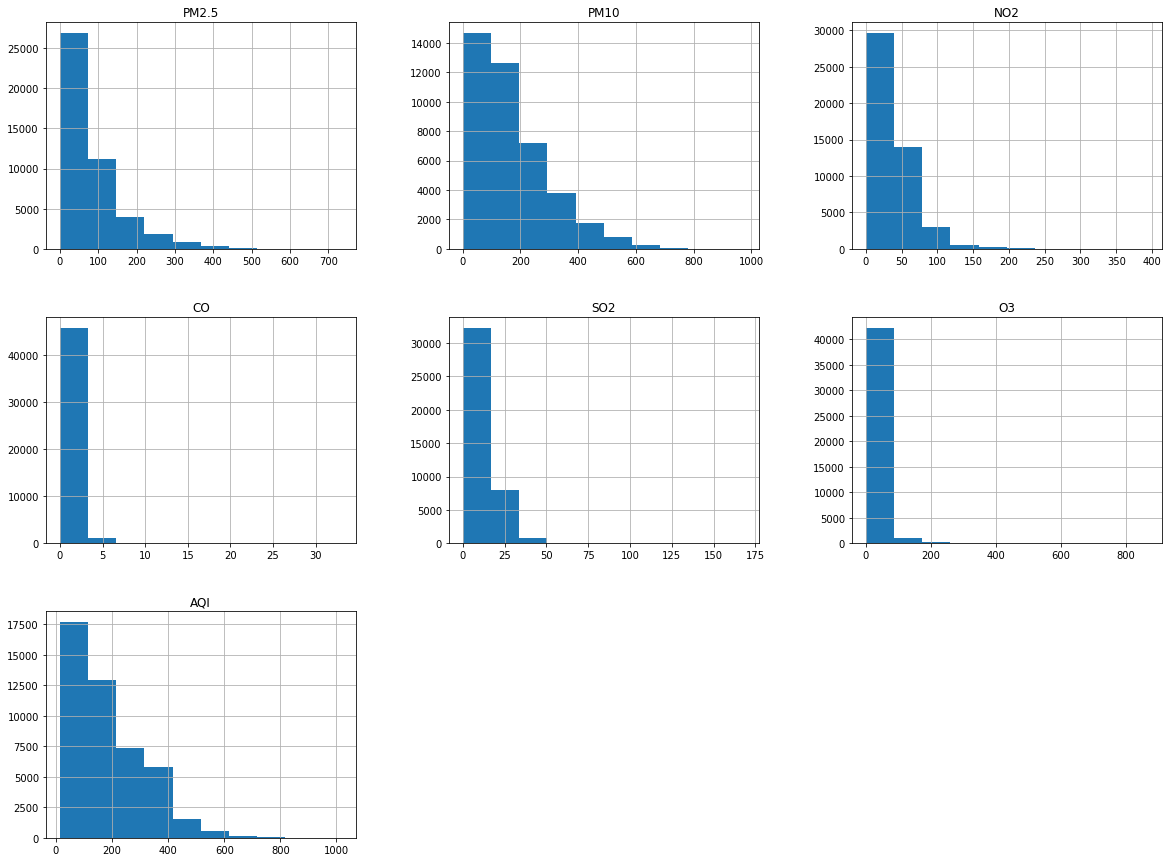

In [ ]:
freq_graph=data1.select_dtypes(include=['float'])
freq_graph.hist(figsize=(20,15))
plt.show() # analysing whether mean or median is using while dealing with outliers by looking into measure of central tendency(skewness)
#the graph shows all the are rightly skewed so we can use meadian

In [ ]:
#replacing missing values with median

data1['PM2.5'] = data1['PM2.5'].groupby(data1['City']).transform(lambda x: x.fillna(x.median()))
data1['PM10'] = data1['PM10'].groupby(data1['City']).transform(lambda x: x.fillna(x.median()))
data1['NO2'] =data1['NO2'].groupby(data1['City']).transform(lambda x: x.fillna(x.median()))
data1['CO'] = data1['CO']  .groupby(data1['City']).transform(lambda x: x.fillna(x.median()))
data1['SO2'] = data1['SO2'].groupby(data1['City']).transform(lambda x: x.fillna(x.median()))
data1['O3'] = data1['O3'] .groupby(data1['City']).transform(lambda x: x.fillna(x.median()))
data1['AQI'] = data1['AQI'] .groupby(data1['City']).transform(lambda x: x.fillna(x.median()))


In [ ]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

In [ ]:
data1["AQI_Bucket"] = data1["AQI"].apply(lambda x: get_AQI_bucket(x))

In [ ]:
data1.isnull().sum()

StationName    0
City           0
State          0
Date           0
PM2.5          0
PM10           0
NO2            0
CO             0
SO2            0
O3             0
AQI            0
AQI_Bucket     0
dtype: int64

In [ ]:
data1.describe()

PM2.5          PM10           NO2            CO           SO2  \
count  18654.000000  18654.000000  18654.000000  18654.000000  18654.000000   
mean     103.236433    210.100055     44.811635      1.283587     14.042395   
std       79.484857    119.068364     31.467188      0.923100      7.542797   
min        0.480000      1.000000      0.340000      0.000000      0.040000   
25%       49.932500    129.422500     24.150000      0.730000      9.832500   
50%       79.750000    187.840000     37.235000      1.060000     12.850000   
75%      129.067500    260.205000     57.217500      1.580000     16.690000   
max      734.560000    976.770000    359.390000     19.290000     92.830000   

                 O3           AQI  
count  18654.000000  18654.000000  
mean      34.474105    224.696044  
std       20.243014    119.560281  
min        0.020000     25.000000  
25%       21.070000    129.000000  
50%       30.815000    200.000000  
75%       43.450000    308.000000  
max      196.470000   1019.000000

In [ ]:
data1.City.value_counts()

Delhi    18654
Name: City, dtype: int64

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.countplot(data1['City'])#count plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


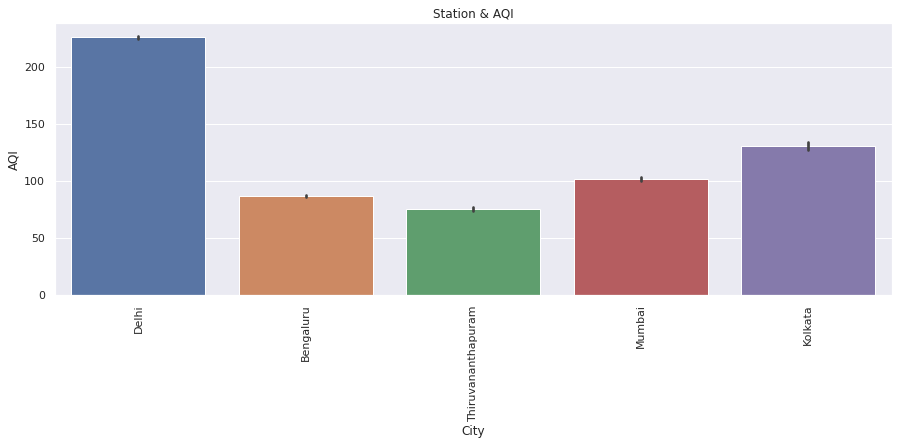

In [ ]:
#AQI VS City
plt.figure(figsize=(15,5))
sns.set(font_scale=1)
sns.barplot(x='City', y='AQI', data=data1).set(title ='Station & AQI')
plt.xticks(rotation=90)
plt.show()

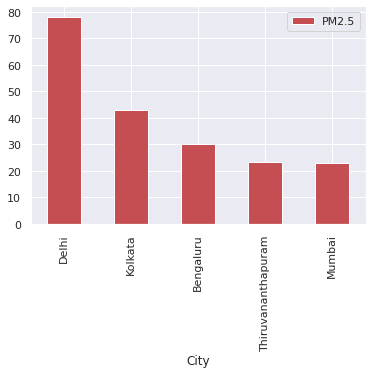

In [ ]:
data1[['PM2.5','City']].groupby(["City"]).median().sort_values(by='PM2.5',ascending=False).head(10).plot.bar(color='r')
plt.show()

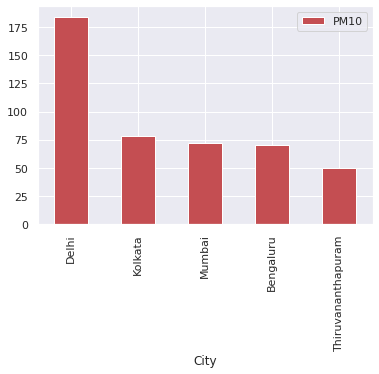

In [ ]:
data1[['PM10','City']].groupby(["City"]).median().sort_values(by='PM10',ascending=False).head(10).plot.bar(color='r')
plt.show()

In [ ]:
data1[['NO2','City']].groupby(["City"]).median().sort_values(by='NO2',ascending=False).head(10).plot.bar(color='r')
plt.show()

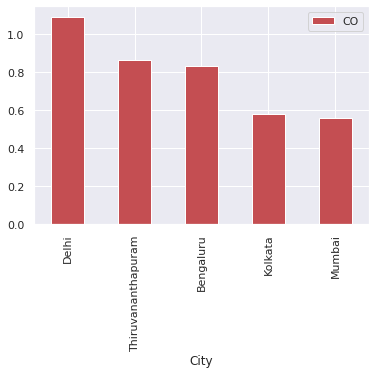

In [ ]:
data1[['CO','City']].groupby(["City"]).median().sort_values(by='CO',ascending=False).head(10).plot.bar(color='r')
plt.show()

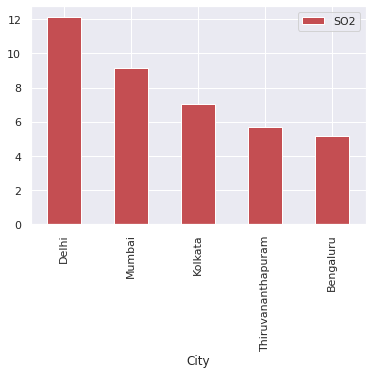

In [ ]:
data1[['SO2','City']].groupby(["City"]).median().sort_values(by='SO2',ascending=False).head(10).plot.bar(color='r')
plt.show()

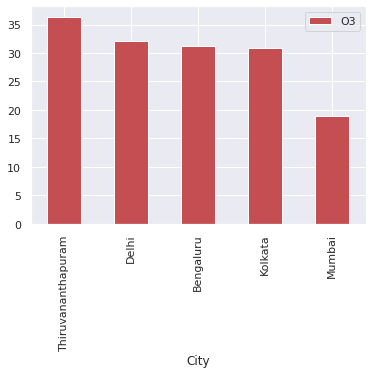

In [ ]:
data1[['O3','City']].groupby(["City"]).median().sort_values(by='O3',ascending=False).head(10).plot.bar(color='r')
plt.show()

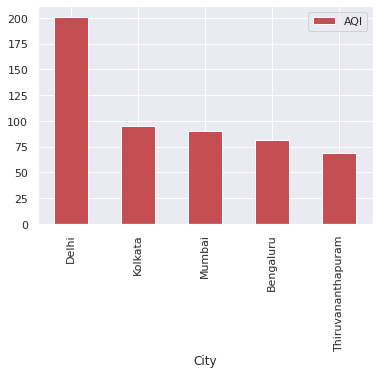

In [ ]:
data1[['AQI','City']].groupby(["City"]).median().sort_values(by='AQI',ascending=False).head(10).plot.bar(color='r')
plt.show()

In [ ]:
data2=data1.copy()

In [ ]:
#year vs AQI
import datetime as dt
data1['Date'] = pd.to_datetime(data1['Date'])
data1['year'] = data1['Date'].dt.year
data1['month'] =data1['Date'].dt.month
data1['day'] =data1['Date'].dt.day

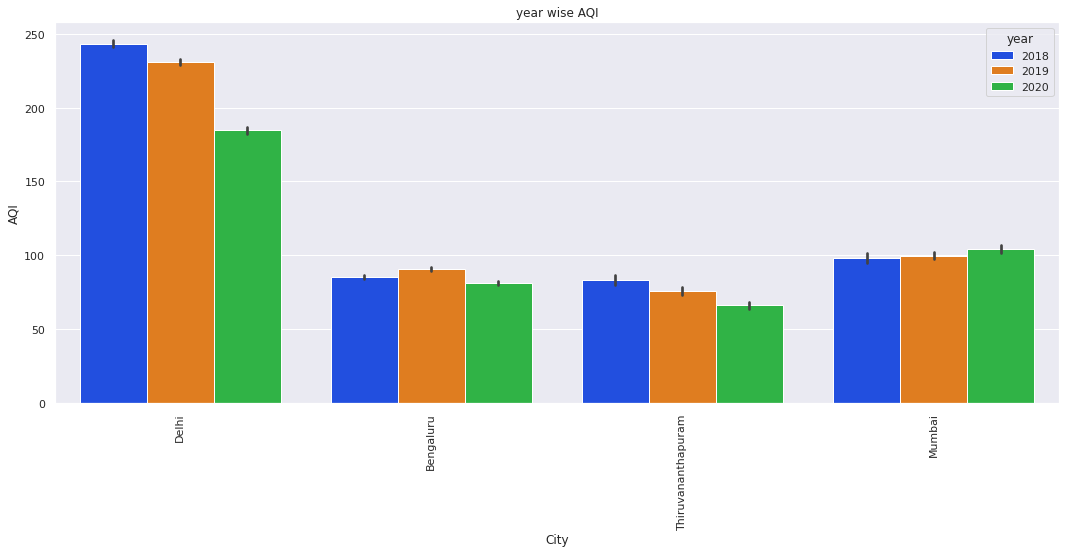

In [ ]:
plt.figure(figsize=(18,7))
sns.set(font_scale=1)
sns.barplot(x='City', y='AQI', data=data1,hue='year',palette='bright').set(title ='year wise AQI')
plt.xticks(rotation=90)
plt.show()

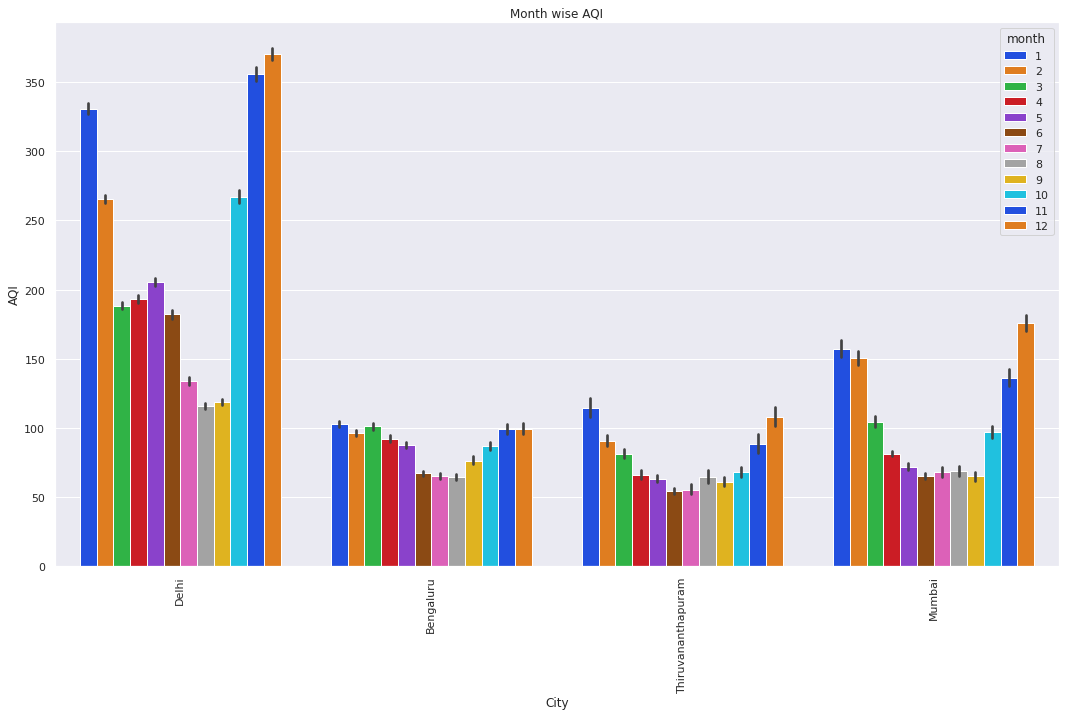

In [ ]:
plt.figure(figsize=(18,10))
sns.set(font_scale=1)
sns.barplot(x='City', y='AQI', data=data1,hue='month',palette = 'bright').set(title ='Month wise AQI')
plt.xticks(rotation=90)
plt.show()

# **Outlier Handling**

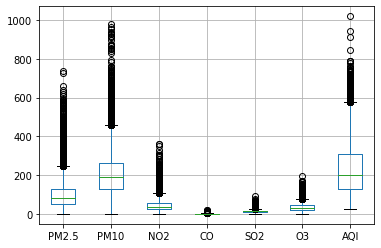

In [ ]:
bxplt = pd.DataFrame(data = data1, columns = ['PM2.5','PM10','NO2','CO','SO2','O3','AQI'])
bxplt.boxplot()

In [ ]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

In [ ]:
#PM10
PM10_outliers = detect_outliers_iqr(data1['PM10'])
print("Outliers from IQR method: ", PM10_outliers)
# print(len(PM10_outliers))

Outliers from IQR method:  [456.41, 456.62, 456.73, 457.28, 457.46, 457.78, 458.11, 458.32, 458.44, 458.46, 458.66, 458.69, 458.84, 459.28, 459.31, 459.56, 459.75, 459.76, 459.76, 459.87, 459.98, 460.04, 460.48, 460.81, 460.96, 461.06, 461.17, 461.25, 461.53, 461.56, 461.64, 461.74, 461.98, 462.18, 462.27, 462.45, 462.74, 462.77, 462.77, 462.82, 462.93, 463.15, 463.16, 463.25, 463.34, 463.45, 463.75, 464.0, 464.03, 464.34, 464.4, 464.68, 464.68, 464.92, 464.96, 465.0, 465.12, 465.2, 465.21, 465.47, 465.66, 465.68, 465.72, 465.94, 466.08, 466.19, 466.42, 466.53, 467.04, 467.26, 467.52, 467.56, 467.59, 467.61, 467.62, 467.65, 467.88, 468.0, 468.0, 468.07, 468.23, 468.49, 468.55, 468.76, 469.18, 469.31, 469.36, 469.65, 469.81, 469.92, 470.0, 470.35, 470.64, 470.66, 470.86, 471.04, 471.04, 471.08, 471.21, 471.7, 471.9, 471.94, 471.95, 472.03, 472.04, 472.24, 472.27, 472.43, 472.46, 472.61, 472.69, 472.87, 473.05, 473.18, 473.36, 473.4, 473.42, 473.84, 473.85, 473.89, 473.9, 473.91, 474.1, 

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(data1['PM10'], 10)
ninetieth_percentile = np.percentile(data1['PM10'], 90)
# print(tenth_percentile, ninetieth_percentile)
data1['PM10'] = np.where(data1['PM10']<tenth_percentile, tenth_percentile, data1['PM10'])
data1['PM10'] = np.where(data1['PM10']>ninetieth_percentile, ninetieth_percentile, data1['PM10'])
# print("Sample:", sample)
print("New array:",data1['PM10'])

New array: 4365     373.224
4366     348.910
4367     373.224
4368     214.160
4369     154.360
          ...   
23014    245.530
23015    201.770
23016    151.680
23017    157.010
23018    101.780
Name: PM10, Length: 18654, dtype: float64


In [ ]:
#PM2.5
PM25_outliers = detect_outliers_iqr(data1['PM2.5'])
print("Outliers from IQR method: ", PM25_outliers)

Outliers from IQR method:  [456.41, 456.62, 456.73, 457.28, 457.46, 457.78, 458.11, 458.32, 458.44, 458.46, 458.66, 458.69, 458.84, 459.28, 459.31, 459.56, 459.75, 459.76, 459.76, 459.87, 459.98, 460.04, 460.48, 460.81, 460.96, 461.06, 461.17, 461.25, 461.53, 461.56, 461.64, 461.74, 461.98, 462.18, 462.27, 462.45, 462.74, 462.77, 462.77, 462.82, 462.93, 463.15, 463.16, 463.25, 463.34, 463.45, 463.75, 464.0, 464.03, 464.34, 464.4, 464.68, 464.68, 464.92, 464.96, 465.0, 465.12, 465.2, 465.21, 465.47, 465.66, 465.68, 465.72, 465.94, 466.08, 466.19, 466.42, 466.53, 467.04, 467.26, 467.52, 467.56, 467.59, 467.61, 467.62, 467.65, 467.88, 468.0, 468.0, 468.07, 468.23, 468.49, 468.55, 468.76, 469.18, 469.31, 469.36, 469.65, 469.81, 469.92, 470.0, 470.35, 470.64, 470.66, 470.86, 471.04, 471.04, 471.08, 471.21, 471.7, 471.9, 471.94, 471.95, 472.03, 472.04, 472.24, 472.27, 472.43, 472.46, 472.61, 472.69, 472.87, 473.05, 473.18, 473.36, 473.4, 473.42, 473.84, 473.85, 473.89, 473.9, 473.91, 474.1, 

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(data1['PM2.5'], 10)
ninetieth_percentile = np.percentile(data1['PM2.5'], 90)
# print(tenth_percentile, ninetieth_percentile)
data1['PM2.5'] = np.where(data1['PM2.5']<tenth_percentile, tenth_percentile, data1['PM2.5'])
data1['PM2.5']= np.where(data1['PM2.5']>ninetieth_percentile, ninetieth_percentile, data1['PM2.5'])
# print("Sample:", sample)
print("New array:",data1['PM2.5'])

New array: 4365     210.971
4366     210.971
4367     210.971
4368     150.410
4369     106.110
          ...   
23014     53.500
23015     49.240
23016     38.520
23017     43.760
23018     34.340
Name: PM2.5, Length: 18654, dtype: float64


In [ ]:
#SO2
SO2_outliers = detect_outliers_iqr(data1['SO2'])
print("Outliers from IQR method: ", SO2_outliers)

Outliers from IQR method:  [456.41, 456.62, 456.73, 457.28, 457.46, 457.78, 458.11, 458.32, 458.44, 458.46, 458.66, 458.69, 458.84, 459.28, 459.31, 459.56, 459.75, 459.76, 459.76, 459.87, 459.98, 460.04, 460.48, 460.81, 460.96, 461.06, 461.17, 461.25, 461.53, 461.56, 461.64, 461.74, 461.98, 462.18, 462.27, 462.45, 462.74, 462.77, 462.77, 462.82, 462.93, 463.15, 463.16, 463.25, 463.34, 463.45, 463.75, 464.0, 464.03, 464.34, 464.4, 464.68, 464.68, 464.92, 464.96, 465.0, 465.12, 465.2, 465.21, 465.47, 465.66, 465.68, 465.72, 465.94, 466.08, 466.19, 466.42, 466.53, 467.04, 467.26, 467.52, 467.56, 467.59, 467.61, 467.62, 467.65, 467.88, 468.0, 468.0, 468.07, 468.23, 468.49, 468.55, 468.76, 469.18, 469.31, 469.36, 469.65, 469.81, 469.92, 470.0, 470.35, 470.64, 470.66, 470.86, 471.04, 471.04, 471.08, 471.21, 471.7, 471.9, 471.94, 471.95, 472.03, 472.04, 472.24, 472.27, 472.43, 472.46, 472.61, 472.69, 472.87, 473.05, 473.18, 473.36, 473.4, 473.42, 473.84, 473.85, 473.89, 473.9, 473.91, 474.1, 

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(data1['SO2'], 10)
ninetieth_percentile = np.percentile(data1['SO2'], 90)
# print(tenth_percentile, ninetieth_percentile)
data1['SO2'] = np.where(data1['SO2']<tenth_percentile, tenth_percentile, data1['SO2'])
data1['SO2']= np.where(data1['SO2']>ninetieth_percentile, ninetieth_percentile, data1['SO2'])
# print("Sample:", sample)
print("New array:",data1['SO2'])

New array: 4365     23.48
4366     14.38
4367     21.33
4368     12.74
4369     12.46
         ...  
23014    12.85
23015    12.85
23016    11.50
23017    13.86
23018    15.86
Name: SO2, Length: 18654, dtype: float64


In [ ]:
#CO
CO_outliers = detect_outliers_iqr(data1['CO'])
print("Outliers from IQR method: ", CO_outliers)

Outliers from IQR method:  [456.41, 456.62, 456.73, 457.28, 457.46, 457.78, 458.11, 458.32, 458.44, 458.46, 458.66, 458.69, 458.84, 459.28, 459.31, 459.56, 459.75, 459.76, 459.76, 459.87, 459.98, 460.04, 460.48, 460.81, 460.96, 461.06, 461.17, 461.25, 461.53, 461.56, 461.64, 461.74, 461.98, 462.18, 462.27, 462.45, 462.74, 462.77, 462.77, 462.82, 462.93, 463.15, 463.16, 463.25, 463.34, 463.45, 463.75, 464.0, 464.03, 464.34, 464.4, 464.68, 464.68, 464.92, 464.96, 465.0, 465.12, 465.2, 465.21, 465.47, 465.66, 465.68, 465.72, 465.94, 466.08, 466.19, 466.42, 466.53, 467.04, 467.26, 467.52, 467.56, 467.59, 467.61, 467.62, 467.65, 467.88, 468.0, 468.0, 468.07, 468.23, 468.49, 468.55, 468.76, 469.18, 469.31, 469.36, 469.65, 469.81, 469.92, 470.0, 470.35, 470.64, 470.66, 470.86, 471.04, 471.04, 471.08, 471.21, 471.7, 471.9, 471.94, 471.95, 472.03, 472.04, 472.24, 472.27, 472.43, 472.46, 472.61, 472.69, 472.87, 473.05, 473.18, 473.36, 473.4, 473.42, 473.84, 473.85, 473.89, 473.9, 473.91, 474.1, 

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(data1['CO'], 10)
ninetieth_percentile = np.percentile(data1['CO'], 90)
# print(tenth_percentile, ninetieth_percentile)
data1['CO'] = np.where(data1['CO']<tenth_percentile, tenth_percentile, data1['CO'])
data1['CO']= np.where(data1['CO']>ninetieth_percentile, ninetieth_percentile, data1['CO'])
# print("Sample:", sample)
print("New array:",data1['CO'])

New array: 4365     1.49
4366     1.53
4367     1.43
4368     0.99
4369     0.70
         ... 
23014    0.62
23015    0.65
23016    0.57
23017    0.64
23018    0.76
Name: CO, Length: 18654, dtype: float64


In [ ]:
#O3
O3_outliers = detect_outliers_iqr(data1['O3'])
print("Outliers from IQR method: ", O3_outliers)

Outliers from IQR method:  [456.41, 456.62, 456.73, 457.28, 457.46, 457.78, 458.11, 458.32, 458.44, 458.46, 458.66, 458.69, 458.84, 459.28, 459.31, 459.56, 459.75, 459.76, 459.76, 459.87, 459.98, 460.04, 460.48, 460.81, 460.96, 461.06, 461.17, 461.25, 461.53, 461.56, 461.64, 461.74, 461.98, 462.18, 462.27, 462.45, 462.74, 462.77, 462.77, 462.82, 462.93, 463.15, 463.16, 463.25, 463.34, 463.45, 463.75, 464.0, 464.03, 464.34, 464.4, 464.68, 464.68, 464.92, 464.96, 465.0, 465.12, 465.2, 465.21, 465.47, 465.66, 465.68, 465.72, 465.94, 466.08, 466.19, 466.42, 466.53, 467.04, 467.26, 467.52, 467.56, 467.59, 467.61, 467.62, 467.65, 467.88, 468.0, 468.0, 468.07, 468.23, 468.49, 468.55, 468.76, 469.18, 469.31, 469.36, 469.65, 469.81, 469.92, 470.0, 470.35, 470.64, 470.66, 470.86, 471.04, 471.04, 471.08, 471.21, 471.7, 471.9, 471.94, 471.95, 472.03, 472.04, 472.24, 472.27, 472.43, 472.46, 472.61, 472.69, 472.87, 473.05, 473.18, 473.36, 473.4, 473.42, 473.84, 473.85, 473.89, 473.9, 473.91, 474.1, 

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(data1['O3'], 10)
ninetieth_percentile = np.percentile(data1['O3'], 90)
# print(tenth_percentile, ninetieth_percentile)
data1['O3'] = np.where(data1['O3']<tenth_percentile, tenth_percentile, data1['O3'])
data1['O3']= np.where(data1['O3']>ninetieth_percentile, ninetieth_percentile, data1['O3'])
# print("Sample:", sample)
print("New array:",data1['O3'].head())

New array: 4365    46.28
4366    45.31
4367    30.40
4368    41.87
4369    27.93
Name: O3, dtype: float64


In [ ]:
#NO2
O3_outliers = detect_outliers_iqr(data1['NO2'])
print("Outliers from IQR method: ", O3_outliers)

Outliers from IQR method:  [456.41, 456.62, 456.73, 457.28, 457.46, 457.78, 458.11, 458.32, 458.44, 458.46, 458.66, 458.69, 458.84, 459.28, 459.31, 459.56, 459.75, 459.76, 459.76, 459.87, 459.98, 460.04, 460.48, 460.81, 460.96, 461.06, 461.17, 461.25, 461.53, 461.56, 461.64, 461.74, 461.98, 462.18, 462.27, 462.45, 462.74, 462.77, 462.77, 462.82, 462.93, 463.15, 463.16, 463.25, 463.34, 463.45, 463.75, 464.0, 464.03, 464.34, 464.4, 464.68, 464.68, 464.92, 464.96, 465.0, 465.12, 465.2, 465.21, 465.47, 465.66, 465.68, 465.72, 465.94, 466.08, 466.19, 466.42, 466.53, 467.04, 467.26, 467.52, 467.56, 467.59, 467.61, 467.62, 467.65, 467.88, 468.0, 468.0, 468.07, 468.23, 468.49, 468.55, 468.76, 469.18, 469.31, 469.36, 469.65, 469.81, 469.92, 470.0, 470.35, 470.64, 470.66, 470.86, 471.04, 471.04, 471.08, 471.21, 471.7, 471.9, 471.94, 471.95, 472.03, 472.04, 472.24, 472.27, 472.43, 472.46, 472.61, 472.69, 472.87, 473.05, 473.18, 473.36, 473.4, 473.42, 473.84, 473.85, 473.89, 473.9, 473.91, 474.1, 

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(data1['NO2'], 10)
ninetieth_percentile = np.percentile(data1['NO2'], 90)
# print(tenth_percentile, ninetieth_percentile)
data1['NO2'] = np.where(data1['NO2']<tenth_percentile, tenth_percentile, data1['NO2'])
data1['NO2']= np.where(data1['NO2']>ninetieth_percentile, ninetieth_percentile, data1['NO2'])
# print("Sample:", sample)
print("New array:",data1['NO2'].head())

New array: 4365    79.860
4366    78.950
4367    82.657
4368    82.657
4369    77.520
Name: NO2, dtype: float64


In [ ]:
#AQI
AQI_outliers = detect_outliers_iqr(data1['AQI'])
print("Outliers from IQR method: ", AQI_outliers)

Outliers from IQR method:  [456.41, 456.62, 456.73, 457.28, 457.46, 457.78, 458.11, 458.32, 458.44, 458.46, 458.66, 458.69, 458.84, 459.28, 459.31, 459.56, 459.75, 459.76, 459.76, 459.87, 459.98, 460.04, 460.48, 460.81, 460.96, 461.06, 461.17, 461.25, 461.53, 461.56, 461.64, 461.74, 461.98, 462.18, 462.27, 462.45, 462.74, 462.77, 462.77, 462.82, 462.93, 463.15, 463.16, 463.25, 463.34, 463.45, 463.75, 464.0, 464.03, 464.34, 464.4, 464.68, 464.68, 464.92, 464.96, 465.0, 465.12, 465.2, 465.21, 465.47, 465.66, 465.68, 465.72, 465.94, 466.08, 466.19, 466.42, 466.53, 467.04, 467.26, 467.52, 467.56, 467.59, 467.61, 467.62, 467.65, 467.88, 468.0, 468.0, 468.07, 468.23, 468.49, 468.55, 468.76, 469.18, 469.31, 469.36, 469.65, 469.81, 469.92, 470.0, 470.35, 470.64, 470.66, 470.86, 471.04, 471.04, 471.08, 471.21, 471.7, 471.9, 471.94, 471.95, 472.03, 472.04, 472.24, 472.27, 472.43, 472.46, 472.61, 472.69, 472.87, 473.05, 473.18, 473.36, 473.4, 473.42, 473.84, 473.85, 473.89, 473.9, 473.91, 474.1, 

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(data1['AQI'], 10)
ninetieth_percentile = np.percentile(data1['AQI'], 90)
# print(tenth_percentile, ninetieth_percentile)
data1['AQI'] = np.where(data1['AQI']<tenth_percentile, tenth_percentile, data1['AQI'])
data1['AQI']= np.where(data1['AQI']>ninetieth_percentile, ninetieth_percentile, data1['AQI'])
# print("Sample:", sample)
print("New array:",data1['AQI'])

New array: 4365     200.0
4366     382.0
4367     382.0
4368     372.0
4369     280.0
         ...  
23014    198.0
23015    189.0
23016    147.0
23017    143.0
23018    120.0
Name: AQI, Length: 18654, dtype: float64


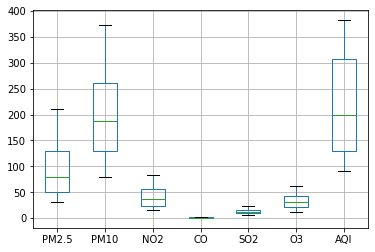

In [ ]:
bxplt = pd.DataFrame(data = data1, columns = ['PM2.5','PM10','NO2','CO','SO2','O3','AQI'])
bxplt.boxplot()

In [ ]:
data2=data1.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data1['AQI_Bucket'] = encoder.fit_transform(data1['AQI_Bucket'])
data1['StationName'] = encoder.fit_transform(data1['StationName'])
data1['City'] = encoder.fit_transform(data1['City'])
data1['State'] = encoder.fit_transform(data1['State'])	

In [ ]:
data1.head()

StationName  City  State        Date    PM2.5     PM10     NO2    CO  \
4365            0     0      0  2018-11-11  210.971  373.224  79.860  1.49   
4366            0     0      0  2018-11-12  210.971  348.910  78.950  1.53   
4367            0     0      0  2018-11-13  210.971  373.224  82.657  1.43   
4368            0     0      0  2018-11-14  150.410  214.160  82.657  0.99   
4369            0     0      0  2018-11-15  106.110  154.360  77.520  0.70   

        SO2     O3    AQI  AQI_Bucket  
4365  23.48  46.28  200.0           1  
4366  14.38  45.31  382.0           4  
4367  21.33  30.40  382.0           4  
4368  12.74  41.87  372.0           5  
4369  12.46  27.93  280.0           2

In [ ]:
x=data1.drop(data[['AQI_Bucket','Date']],axis=1)
y=data1['AQI_Bucket']
x.head()

StationName  City  State    PM2.5     PM10     NO2    CO    SO2     O3  \
4365            0     0      0  210.971  373.224  79.860  1.49  23.48  46.28   
4366            0     0      0  210.971  348.910  78.950  1.53  14.38  45.31   
4367            0     0      0  210.971  373.224  82.657  1.43  21.33  30.40   
4368            0     0      0  150.410  214.160  82.657  0.99  12.74  41.87   
4369            0     0      0  106.110  154.360  77.520  0.70  12.46  27.93   

        AQI  
4365  200.0  
4366  382.0  
4367  382.0  
4368  372.0  
4369  280.0

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)
x=pd.DataFrame(x,columns=['PM2.5','PM10','NO2','CO','SO2','O3','AQI','year','month','day','StationName','City','State'])
x.head()

ValueError: ignored

In [ ]:
data2.head()

StationName   City  State        Date    PM2.5     PM10  \
4365  Alipur, Delhi - DPCC  Delhi  Delhi  2018-11-11  210.971  373.224   
4366  Alipur, Delhi - DPCC  Delhi  Delhi  2018-11-12  210.971  348.910   
4367  Alipur, Delhi - DPCC  Delhi  Delhi  2018-11-13  210.971  373.224   
4368  Alipur, Delhi - DPCC  Delhi  Delhi  2018-11-14  150.410  214.160   
4369  Alipur, Delhi - DPCC  Delhi  Delhi  2018-11-15  106.110  154.360   

         NO2    CO    SO2     O3    AQI AQI_Bucket  
4365  79.860  1.49  23.48  46.28  200.0   Moderate  
4366  78.950  1.53  14.38  45.31  382.0     Severe  
4367  82.657  1.43  21.33  30.40  382.0     Severe  
4368  82.657  0.99  12.74  41.87  372.0  Very Poor  
4369  77.520  0.70  12.46  27.93  280.0       Poor

# **Multiple Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ind = data1.drop(['AQI_Bucket','Date'],axis=1)  # independent variables
ind

StationName  City  State    PM2.5     PM10     NO2    CO    SO2     O3  \
4365             0     0      0  210.971  373.224  79.860  1.49  23.48  46.28   
4366             0     0      0  210.971  348.910  78.950  1.53  14.38  45.31   
4367             0     0      0  210.971  373.224  82.657  1.43  21.33  30.40   
4368             0     0      0  150.410  214.160  82.657  0.99  12.74  41.87   
4369             0     0      0  106.110  154.360  77.520  0.70  12.46  27.93   
...            ...   ...    ...      ...      ...     ...   ...    ...    ...   
23014           21     0      0   53.500  245.530  22.390  0.62  12.85  31.87   
23015           21     0      0   49.240  201.770  23.820  0.65  12.85  24.92   
23016           21     0      0   38.520  151.680  17.640  0.57  11.50  36.02   
23017           21     0      0   43.760  157.010  22.690  0.64  13.86  34.21   
23018           21     0      0   34.340  101.780  31.310  0.76  15.86  28.10   

         AQI  
4365   200.0  
4366   382.0  
4367   382.0  
4368   372.0  
4369   280.0  
...      ...  
23014  198.0  
23015  189.0  
23016  147.0  
23017  143.0  
23018  120.0  

[18654 rows x 10 columns]

In [ ]:
y=data1['AQI'] #  dependent variable
y

4365     200.0
4366     382.0
4367     382.0
4368     372.0
4369     280.0
         ...  
23014    198.0
23015    189.0
23016    147.0
23017    143.0
23018    120.0
Name: AQI, Length: 18654, dtype: float64

In [ ]:
import statsmodels.api as sm
model=sm.regression.linear_model.OLS(y,ind)

In [ ]:
results=model.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    AQI   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.992e+33
Date:                Sat, 07 Jan 2023   Prob (F-statistic):                        0.00
Time:                        12:01:04   Log-Likelihood:                      5.1419e+05
No. Observations:               18654   AIC:                                 -1.028e+06
Df Residuals:                   18646   BIC:                                 -1.028e+06
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
StationName  2.441e-14   2.71e-16     89.981      0.000    2.39e-14    2.49e-14
City         3.418e-16   1.81e-30   1.88e+14      0.000    3.42e-16    3.42e-16
State        9.581e-17   2.17e-31   4.42e+14      0.000    9.58e-17    9.58e-17
PM2.5         1.22e-15    7.9e-17     15.445      0.000    1.07e-15    1.38e-15
PM10         -3.16e-16   3.89e-17     -8.117      0.000   -3.92e-16    -2.4e-16
NO2           -5.1e-16   1.04e-16     -4.919      0.000   -7.13e-16   -3.07e-16
CO            3.51e-14   3.84e-15      9.150      0.000    2.76e-14    4.26e-14
SO2          6.704e-15   3.53e-16     18.994      0.000    6.01e-15     7.4e-15
O3          -8.547e-16   1.17e-16     -7.318      0.000   -1.08e-15   -6.26e-16
AQI             1.0000   4.93e-17   2.03e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     2272.805   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              615.092
Skew:                           0.084   Prob(JB):                    2.72e-134
Kurtosis:                       2.126   Cond. No.                     3.79e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.55e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# **Multiple Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(ind,y,test_size=.3,random_state=0)

In [ ]:
ml=LinearRegression()
ml.fit(X_train,y_train)

ValueError: ignored

In [ ]:
y_pred=ml.predict(X_test)
y_pred

array([253., 142., 252., ..., 200., 210., 312.])

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test,y_pred)

1.0

In [ ]:
from mlxtend.plotting import plot_learning_curves
 
# Plot the learning curves
plot_learning_curves(X_train, y_train, X_test, y_test, ml)

# **Logistic** **Regression** 

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data2['StationName'] = encoder.fit_transform(data2['StationName'])
data2['City'] = encoder.fit_transform(data2['City'])
data2['State'] = encoder.fit_transform(data2['State'])	

In [ ]:
data2.head()

StationName  City  State        Date    PM2.5     PM10     NO2    CO  \
4365            0     0      0  2018-11-11  210.971  373.224  79.860  1.49   
4366            0     0      0  2018-11-12  210.971  348.910  78.950  1.53   
4367            0     0      0  2018-11-13  210.971  373.224  82.657  1.43   
4368            0     0      0  2018-11-14  150.410  214.160  82.657  0.99   
4369            0     0      0  2018-11-15  106.110  154.360  77.520  0.70   

        SO2     O3    AQI AQI_Bucket  
4365  23.48  46.28  200.0   Moderate  
4366  14.38  45.31  382.0     Severe  
4367  21.33  30.40  382.0     Severe  
4368  12.74  41.87  372.0  Very Poor  
4369  12.46  27.93  280.0       Poor

In [ ]:
y=data2['AQI_Bucket']
x=data2.drop(['AQI','AQI_Bucket','Date'],axis=1) #splitting dependent and independent data

In [ ]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.71243202,  0.        ,  0.        ,  2.01595845,  1.87514177,
         1.74644247,  0.48146696,  1.84346962,  0.85526194],
       [-1.71243202,  0.        ,  0.        ,  2.01595845,  1.60880905,
         1.70430875,  0.54882878,  0.15849618,  0.79206155],
       [-1.71243202,  0.        ,  0.        ,  2.01595845,  1.87514177,
         1.87594582,  0.38042422,  1.4453715 , -0.17940014],
       [-1.71243202,  0.        ,  0.        ,  0.95342089,  0.13277327,
         1.87594582, -0.36055584, -0.14516936,  0.5679282 ],
       [-1.71243202,  0.        ,  0.        ,  0.17618118, -0.52226896,
         1.6380986 , -0.84892906, -0.1970147 , -0.34033309]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (14923, 9) (14923,)
Test set: (3731, 9) (3731,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression().fit(X_train,y_train)
LR

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
yhat = LR.predict(X_test)
yhat

array(['Moderate', 'Moderate', 'Severe', ..., 'Severe', 'Moderate',
       'Moderate'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy=accuracy_score(y_test,yhat)*100
print("Accuracy of the model is {:.2f}".format(accuracy))
     

Accuracy of the model is 71.08


In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[1.27586517e-05, 6.76386668e-01, 2.91178008e-01, 8.92437205e-03,
        6.40668915e-05, 2.34341264e-02],
       [3.43330001e-05, 9.10367489e-01, 5.08824432e-02, 3.82515986e-02,
        3.57888044e-07, 4.63778518e-04],
       [3.18104623e-22, 5.40290806e-07, 2.84464097e-03, 5.94260677e-15,
        6.74937162e-01, 3.22217656e-01],
       ...,
       [8.17092682e-20, 2.58674680e-07, 1.28218729e-03, 8.43017395e-14,
        7.06403535e-01, 2.92314019e-01],
       [1.90824514e-03, 7.28036838e-01, 1.69242753e-01, 9.20036539e-02,
        1.47947266e-05, 8.79371615e-03],
       [2.08688919e-02, 6.39898160e-01, 3.90694232e-02, 2.99351633e-01,
        7.84662779e-07, 8.11107512e-04]])

In [ ]:
confusion_matrix(y_test,yhat)

array([[   0,    4,    0,   36,    0,    0],
       [   0, 1270,   72,  127,    4,   20],
       [   0,  240,  375,    1,    1,   76],
       [   0,  186,    0,  295,    0,    0],
       [   0,    1,   10,    0,  221,   76],
       [   0,    8,  108,    0,  109,  491]])

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

([0.27010723860589814,
  0.27245308310991956,
  0.2712243074173369,
  0.27910872843022283,
  0.2790510655408122,
  0.2809114263375405,
  0.2823090178058587,
  0.2819567766795108,
  0.28183172002978407,
  0.2832540373919453],
 [0.2975073706781024,
  0.29375502546234256,
  0.2961672473867596,
  0.2975073706781024,
  0.29241490217099975,
  0.29375502546234256,
  0.29348700080407397,
  0.2900026802465827,
  0.29080675422138835,
  0.289198606271777])

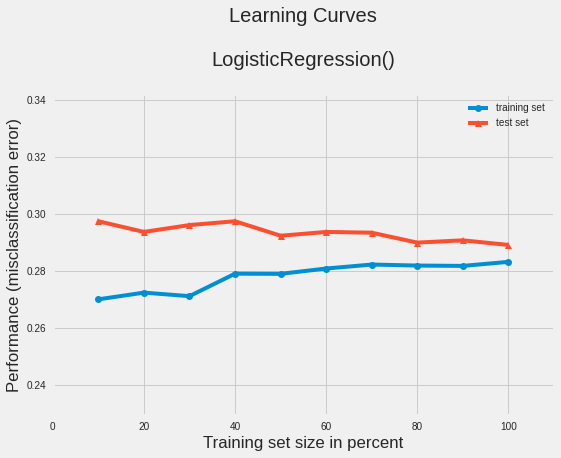

In [ ]:
from mlxtend.plotting import plot_learning_curves
 
# Plot the learning curves
plot_learning_curves(X_train, y_train, X_test, y_test, LR)

/usr/local/lib/python3.8/dist-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


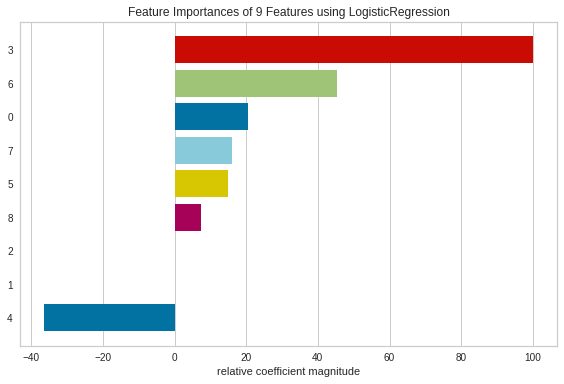

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(LR)
viz.fit(X_train, y_train)
viz.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Cross-Validation Accuracy Scores [0.72002679 0.72538513 0.72203617 0.70375335 0.71179625 0.72386059
 0.71246649 0.70375335 0.71715818 0.70643432]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7037533512064343, 0.7146670611199001, 0.725385130609511)

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(LR)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()  

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dt=DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
confusion_matrix(y_test, y_pred_dt)

array([[   7,    0,    0,   33,    0,    0],
       [   0, 1493,    0,    0,    0,    0],
       [   0,    0,  693,    0,    0,    0],
       [  27,    0,    0,  454,    0,    0],
       [   0,    0,    0,    0,  259,   49],
       [   0,    0,    0,    0,   46,  670]])

In [ ]:

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

Accuracy: 0.9584561779683731


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

        Good       0.21      0.17      0.19        40
    Moderate       1.00      1.00      1.00      1493
        Poor       1.00      1.00      1.00       693
Satisfactory       0.93      0.94      0.94       481
      Severe       0.85      0.84      0.85       308
   Very Poor       0.93      0.94      0.93       716

    accuracy                           0.96      3731
   macro avg       0.82      0.82      0.82      3731
weighted avg       0.96      0.96      0.96      3731



In [ ]:
from mlxtend.plotting import plot_learning_curves
 
# Plot the learning curves
plot_learning_curves(X_train, y_train, X_test, y_test, clf_dt)

([0.0,
  0.0,
  0.0,
  0.00016753224995811694,
  0.00013403029084573114,
  0.00011169440411035407,
  9.573042312847023e-05,
  8.376612497905847e-05,
  7.44601638123604e-05,
  6.701065469409636e-05],
 [0.04100777271508979,
  0.043151969981238276,
  0.04341999463950683,
  0.04341999463950683,
  0.044224068614312516,
  0.040471723398552664,
  0.036987402841061376,
  0.042347896006432593,
  0.04341999463950683,
  0.040471723398552664])

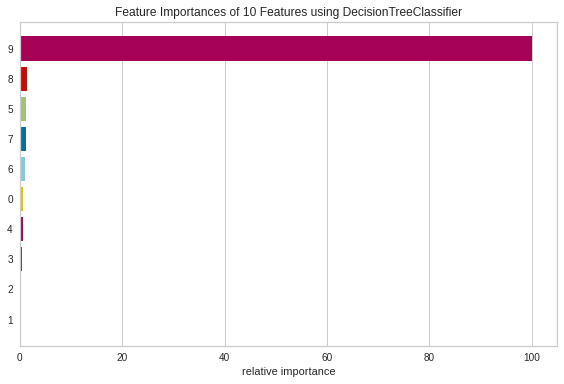

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(clf_dt)
viz.fit(X_train, y_train)
viz.show()

In [ ]:
from yellowbrick.model_selection import validation_curve

viz = validation_curve(
    clf_dt, X_test, y_test, param_name="max_depth",
    param_range=np.arange(1, 11),
)

In [ ]:
clf_dt=DecisionTreeClassifier(max_depth=4)
clf_dt = clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm=confusion_matrix(y_test, y_pred_dt)
cm

array([[   0,    0,    0,   40,    0,    0],
       [   0, 1493,    0,    0,    0,    0],
       [   0,    0,  693,    0,    0,    0],
       [   0,    0,    0,  481,    0,    0],
       [   0,    0,    0,    0,  308,    0],
       [   0,    0,    0,    0,   71,  645]])

In [ ]:
ax=sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')

In [ ]:
score =accuracy_score(y_test,y_pred_dt)
score

0.9702492629321897

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.97655727 0.96651038 0.96918955 0.97117962 0.97654155 0.9772118
 0.97654155 0.97050938 0.96715818 0.97453083]


In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.9665103817816477, 0.9725930122519928, 0.9772117962466488)

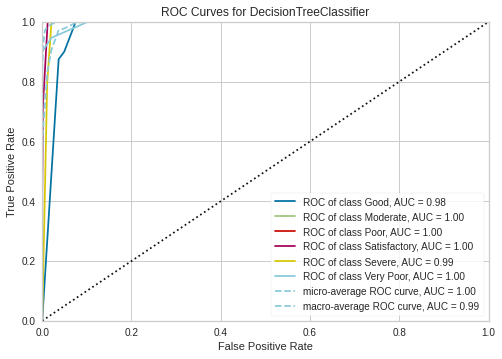

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clf_dt)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()  

# **Random Forest**

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9691771642991155


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm1=confusion_matrix(y_test,y_pred)
cm1

array([[   2,    0,    0,   38,    0,    0],
       [   0, 1493,    0,    0,    0,    0],
       [   0,    0,  693,    0,    0,    0],
       [   8,    0,    0,  473,    0,    0],
       [   0,    0,    0,    0,  294,   14],
       [   0,    0,    0,    0,   55,  661]])

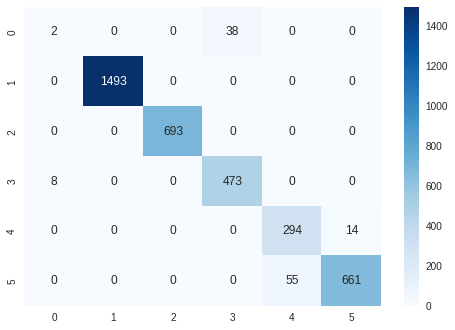

In [ ]:
ax1=sns.heatmap(cm1,annot=True,fmt='d',cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.20      0.05      0.08        40
    Moderate       1.00      1.00      1.00      1493
        Poor       1.00      1.00      1.00       693
Satisfactory       0.93      0.98      0.95       481
      Severe       0.84      0.95      0.89       308
   Very Poor       0.98      0.92      0.95       716

    accuracy                           0.97      3731
   macro avg       0.82      0.82      0.81      3731
weighted avg       0.96      0.97      0.97      3731



([0.0,
  0.0,
  0.0,
  0.00016753224995811694,
  0.00013403029084573114,
  0.00011169440411035407,
  9.573042312847023e-05,
  8.376612497905847e-05,
  7.44601638123604e-05,
  6.701065469409636e-05],
 [0.03243098365049585,
  0.0313588850174216,
  0.03296703296703297,
  0.030822835700884482,
  0.02948271240954168,
  0.0300187617260788,
  0.03028678638434736,
  0.0300187617260788,
  0.030554811042615922,
  0.031626909675690165])

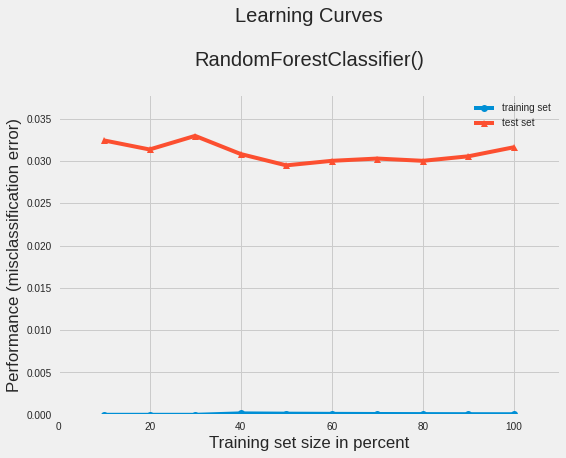

In [ ]:
from mlxtend.plotting import plot_learning_curves
 
# Plot the learning curves
plot_learning_curves(X_train, y_train, X_test, y_test, clf)

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(clf)
viz.fit(X_train, y_train)
viz.show()

In [ ]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.97119893 0.96383121 0.96718017 0.96782842 0.97520107 0.97654155
 0.97117962 0.9691689  0.96983914 0.97252011]


In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.9638312123241795, 0.9704489135177747, 0.9765415549597856)

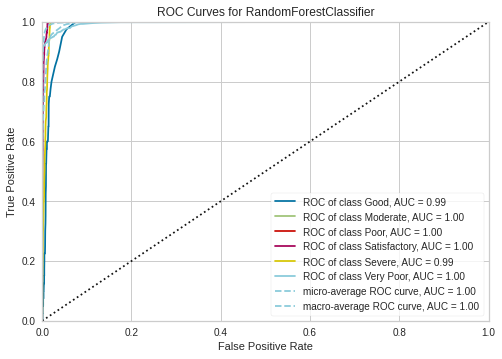

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clf)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()  

# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
reg= xgb.XGBClassifier(n_estimators=10,learning_rate=0.01)
xgb_model=reg.fit(X_train, y_train)
y_pred_xg=reg.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

        Good       0.00      0.00      0.00        40
    Moderate       1.00      1.00      1.00      1493
        Poor       1.00      1.00      1.00       693
Satisfactory       0.92      1.00      0.96       481
      Severe       0.81      1.00      0.90       308
   Very Poor       1.00      0.90      0.95       716

    accuracy                           0.97      3731
   macro avg       0.79      0.82      0.80      3731
weighted avg       0.96      0.97      0.97      3731



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
score =accuracy_score(y_test,y_pred_xg)
score

0.9702492629321897

In [ ]:
cm3=confusion_matrix(y_test, y_pred_xg)

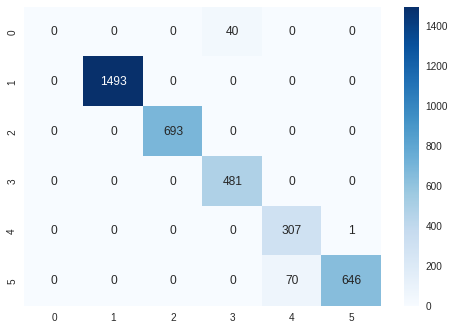

In [ ]:
ax3=sns.heatmap(cm3,annot=True,fmt='d',cmap='Blues')

([0.01876675603217158,
  0.02546916890080429,
  0.027256478999106343,
  0.027642821243089293,
  0.02720814904168342,
  0.026583268178264268,
  0.02613440551407237,
  0.026470095493382476,
  0.02732688011913626,
  0.02707230449641493],
 [0.02975073706781024,
  0.030554811042615922,
  0.030822835700884482,
  0.030822835700884482,
  0.02975073706781024,
  0.02975073706781024,
  0.02975073706781024,
  0.02975073706781024,
  0.02975073706781024,
  0.02975073706781024])

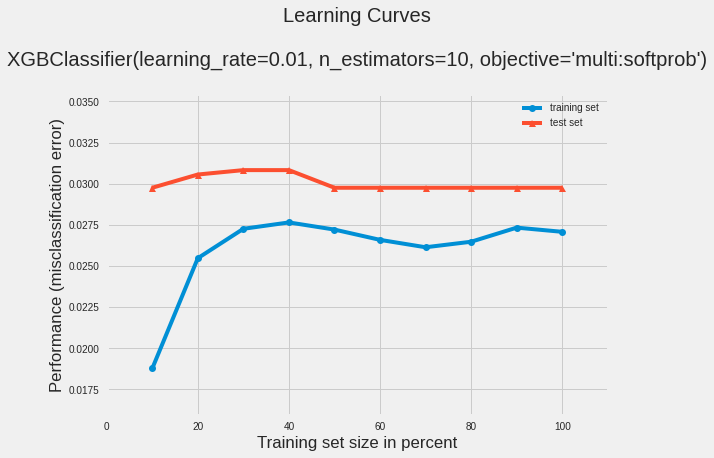

In [ ]:
from mlxtend.plotting import plot_learning_curves
 
# Plot the learning curves
plot_learning_curves(X_train, y_train, X_test, y_test, xgb_model)

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(xgb_model)
viz.fit(X_train, y_train)
viz.show()

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(xgb_model)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()  

# Gradient Boost Algorithm

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
grad_regressor=GradientBoostingRegressor(learning_rate=0.1)

In [ ]:
#model=grad_regressor.fit(X_train,y_train)

ValueError: could not convert string to float: 'Satisfactory'

# AdaBoost 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier #For Classification
cl_dtree = AdaBoostClassifier( base_estimator=DecisionTreeClassifier())
cldtree=cl_dtree.fit(X_train,y_train)

In [ ]:
y_pred_Ada=cldtree.predict(X_test)


In [ ]:
score =accuracy_score(y_test,y_pred_Ada)
score

0.7464486732779416

In [ ]:
cm4=confusion_matrix(y_test, y_pred_Ada)

In [ ]:
ax4=sns.heatmap(cm4,annot=True,fmt='d',cmap='Blues')

([0.0,
  0.0,
  0.00022341376228775692,
  0.0005025967498743508,
  0.0004020908725371934,
  0.0003350832123310622,
  0.0006701129618992916,
  0.0005863628748534093,
  0.0005212211466865227,
  0.0004690745828586745],
 [0.3036719378182793,
  0.3130528008576789,
  0.2489949075314929,
  0.24738675958188153,
  0.24604663629053872,
  0.24390243902439024,
  0.2463146609488073,
  0.24390243902439024,
  0.24658268560707586,
  0.24604663629053872])

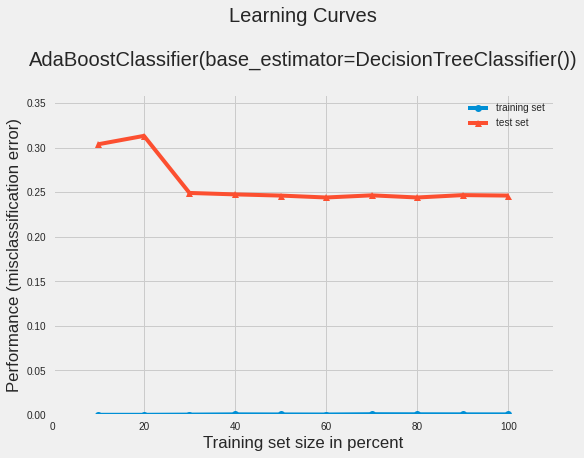

In [ ]:
plot_learning_curves(X_train, y_train, X_test, y_test, cldtree)

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(cldtree)
viz.fit(X_train, y_train)
viz.show()

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:631: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


In [ ]:
scores = cross_val_score(cldtree, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.76155392 0.76825184 0.76155392 0.75737265 0.76407507 0.75871314
 0.76273458 0.74530831 0.76541555 0.75670241]


In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7453083109919572, 0.7601681394317359, 0.768251841929002)

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(cldtree)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()  

From the above graph we can see that the the False positive rate for AQI Bucket value Poor is high

# KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn1=knn.fit(X_train, y_train)

In [ ]:
y_pred_knn=knn1.predict(X_test)

In [ ]:
score =accuracy_score(y_test,y_pred_knn)
score

0.7086571964620745

In [ ]:
cm5=confusion_matrix(y_test, y_pred_knn)

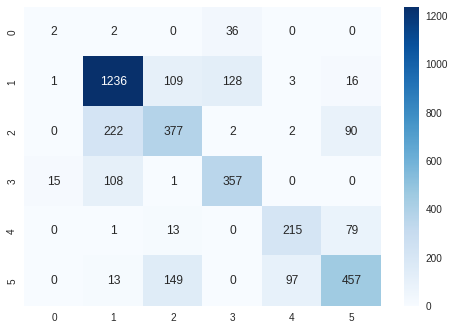

In [ ]:
ax5=sns.heatmap(cm5,annot=True,fmt='d',cmap='Blues')

([0.21514745308310992,
  0.2054289544235925,
  0.20464700625558535,
  0.2058971351985257,
  0.20198364830451682,
  0.19881603931643024,
  0.1926096113344821,
  0.19433740995141566,
  0.1932241250930752,
  0.19198552569858607],
 [0.34709193245778613,
  0.31814526936478155,
  0.3076923076923077,
  0.30313588850174217,
  0.29429107477887967,
  0.28678638434736,
  0.2846421870812115,
  0.2883945322969713,
  0.2905387295631198,
  0.29134280353792547])

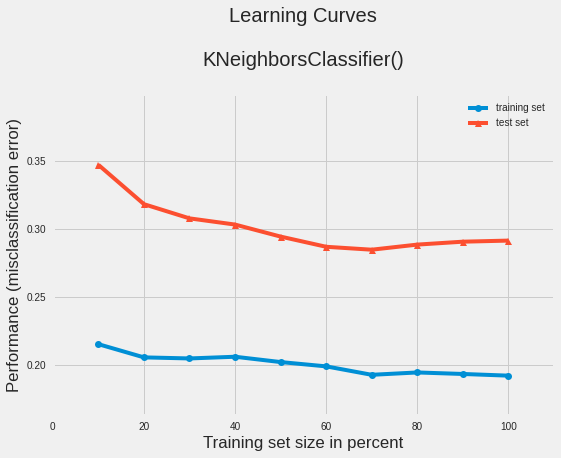

In [ ]:
plot_learning_curves(X_train, y_train, X_test, y_test, knn1)

In [ ]:
scores = cross_val_score(knn, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.71734762 0.71265908 0.74212994 0.70643432 0.72855228 0.72184987
 0.730563   0.71045576 0.72520107 0.71179625]


In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7064343163538874, 0.720698918455922, 0.7421299397186872)

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(knn)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

# SVM Model

In [ ]:
from sklearn import svm

In [ ]:
svm=svm.SVC()
svm_model=svm.fit(X_train,y_train)
y_pred_svm=svm_model.predict(X_test)

In [ ]:
score =accuracy_score(y_test,y_pred_svm)
score

0.7502010184937015

In [ ]:
cm6=confusion_matrix(y_test, y_pred_svm)

In [ ]:
ax6=sns.heatmap(cm6,annot=True,fmt='d',cmap='Blues')

([0.22319034852546918,
  0.2339142091152815,
  0.2276586237712243,
  0.23521527894119618,
  0.23616137247017827,
  0.2329945269741986,
  0.23367796285659584,
  0.23689060144077734,
  0.23618763961280714,
  0.23634657910607787],
 [0.2816939158402573,
  0.2682926829268293,
  0.26293218976145805,
  0.2626641651031895,
  0.2570356472795497,
  0.25542749932993836,
  0.25328330206378985,
  0.24953095684803,
  0.24953095684803,
  0.2497989815062986])

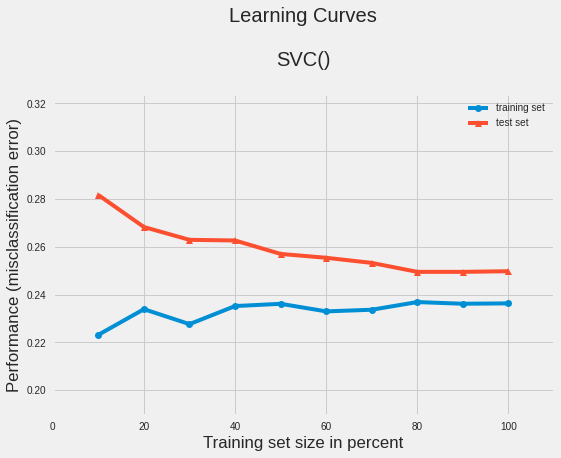

In [ ]:
plot_learning_curves(X_train, y_train, X_test, y_test, svm_model)

In [ ]:
scores = cross_val_score(svm_model, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.74949766 0.75686537 0.76088413 0.74061662 0.74932976 0.75201072
 0.74396783 0.74329759 0.75201072 0.74396783]


In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7406166219839142, 0.749244822576851, 0.7608841259209645)

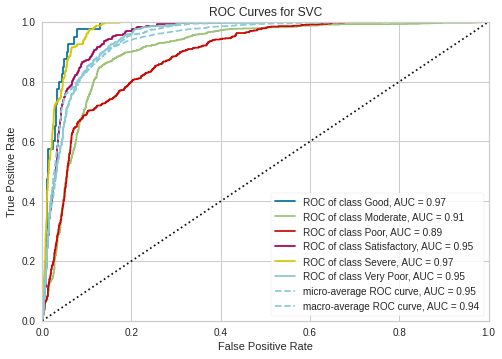

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(svm)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

# Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB  
NB = GaussianNB()  
NB_model=NB.fit(X_train, y_train)  

In [ ]:
y_pred_NB= NB_model.predict(X_test)

In [ ]:
score =accuracy_score(y_test,y_pred_NB)
score

0.8627808136004858

In [ ]:
cm7=confusion_matrix(y_test, y_pred_svm)
ax7=sns.heatmap(cm7,annot=True,fmt='d',cmap='Blues')

In [ ]:
plot_learning_curves(X_train, y_train, X_test, y_test, NB_model)

([0.11702127659574468,
  0.14958238420653,
  0.152834008097166,
  0.1461100569259962,
  0.14420157862780814,
  0.14802631578947367,
  0.14877466926913901,
  0.149146110056926,
  0.15095294316073538,
  0.151183970856102],
 [0.1111111111111111,
  0.13479052823315119,
  0.14025500910746813,
  0.14146933819064966,
  0.14268366727383122,
  0.14146933819064966,
  0.13964784456587737,
  0.13721918639951428,
  0.1384335154826958,
  0.13721918639951428])

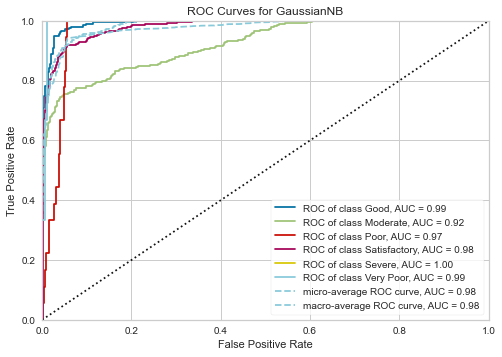

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(NB_model)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()  

Higher the area under the curve better is the model.

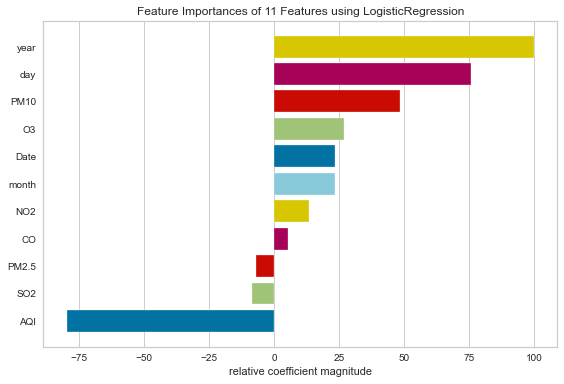

<AxesSubplot:title={'center':'Feature Importances of 11 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [ ]:
scores = cross_val_score(NB_model, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.84522003 0.86949924 0.84370258 0.87556904 0.85584219 0.82094082
 0.83004552 0.84825493 0.83738602 0.84042553]


In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8209408194233687, 0.8466885905235436, 0.8755690440060698)

# **timeseries**


In [ ]:
data_t=data2[['Date','AQI']]

In [ ]:
data_t

Date    AQI
4365   2018-11-11  201.0
4366   2018-11-12  353.0
4367   2018-11-13  353.0
4368   2018-11-14  353.0
4369   2018-11-15  280.0
...           ...    ...
77393  2020-06-27   61.0
77394  2020-06-28   65.0
77395  2020-06-29   63.0
77396  2020-06-30   61.0
77397  2020-07-01   61.0

[49861 rows x 2 columns]

In [ ]:
#set hour as index column
data_t.set_index('Date')
data_t.index = pd.to_datetime(data_t.Date)
data_t.drop(['Date'], axis = 1, inplace=True)
data_t

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


AQI
Date             
2018-11-11  201.0
2018-11-12  353.0
2018-11-13  353.0
2018-11-14  353.0
2018-11-15  280.0
...           ...
2020-06-27   61.0
2020-06-28   65.0
2020-06-29   63.0
2020-06-30   61.0
2020-07-01   61.0

[49861 rows x 1 columns]

Observations: 24931
Training Observations: 12466
Testing Observations: 12465
Observations: 37396
Training Observations: 24931
Testing Observations: 12465
Observations: 49861
Training Observations: 37396
Testing Observations: 12465


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must 

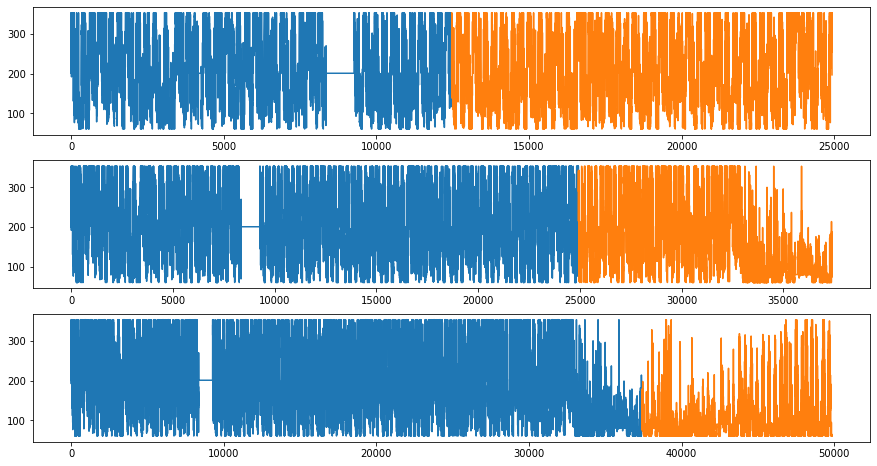

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot
X = data_t.values
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1,figsize = (15,8))
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    pyplot.subplot(310 + index)
    pyplot.plot(train)
    pyplot.plot([None for i in train] + [x for x in test])
    index += 1
pyplot.show()

In [ ]:
pd.DataFrame(train)

0
0      201.0
1      353.0
2      353.0
3      353.0
4      280.0
...      ...
37391   93.0
37392   94.0
37393   81.0
37394   81.0
37395   81.0

[37396 rows x 1 columns]

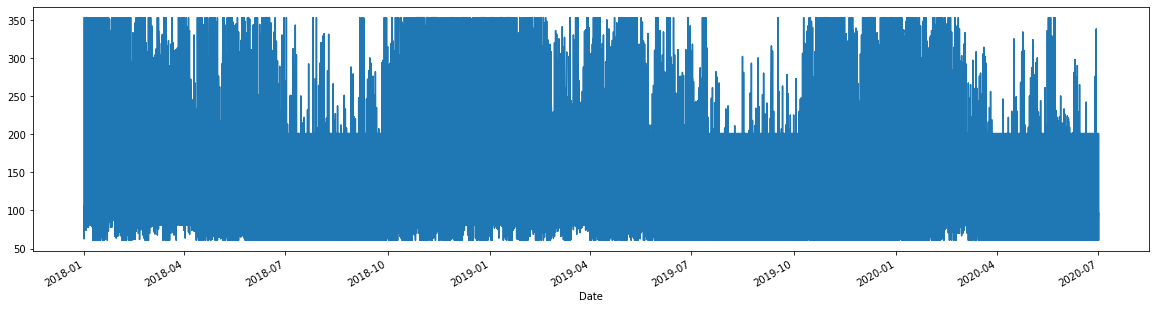

In [ ]:
data_t['AQI'].plot(figsize=(20,5)) #plot the graph

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(data_t['AQI'])

In [ ]:
from statsmodels.tsa.stattools import adfuller
test=adfuller(data_t['AQI'],autolag ='AIC')
test # If p< 0.05 ; Data is stationary

(-15.963198232377714,
 7.139913757761461e-29,
 57,
 49803,
 {'1%': -3.4304813101034073,
  '5%': -2.861598036363896,
  '10%': -2.566800890837946},
 506158.1330768897)

In [ ]:
#Determine rolling statistics
rolmean = data_t.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = data_t.rolling(window=12).std()
print(rolmean,rolstd)

                  AQI
Date                 
2018-11-11        NaN
2018-11-12        NaN
2018-11-13        NaN
2018-11-14        NaN
2018-11-15        NaN
...               ...
2020-06-27  61.000000
2020-06-28  61.333333
2020-06-29  61.500000
2020-06-30  61.500000
2020-07-01  61.500000

[49861 rows x 1 columns]                  AQI
Date                
2018-11-11       NaN
2018-11-12       NaN
2018-11-13       NaN
2018-11-14       NaN
2018-11-15       NaN
...              ...
2020-06-27  0.000026
2020-06-28  1.154701
2020-06-29  1.243163
2020-06-30  1.243163
2020-07-01  1.243163

[49861 rows x 1 columns]


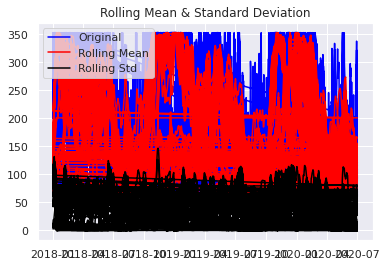

In [ ]:
#Plot rolling statistics
orig = plt.plot(data_t, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(data_t['AQI'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -1.596320e+01
p-value                        7.139914e-29
#Lags Used                     5.700000e+01
Number of Observations Used    4.980300e+04
Critical Value (1%)           -3.430481e+00
Critical Value (5%)           -2.861598e+00
Critical Value (10%)          -2.566801e+00
dtype: float64


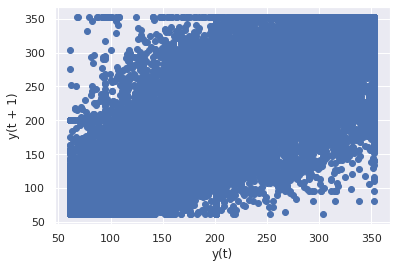

In [ ]:
from pandas.plotting import lag_plot
lag_plot(data_t) #Non stationary cause it has a strong correlation between 2 axis

In [ ]:
#ACF & PACF plots
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data_t, nlags=20)
lag_pacf = pacf(data_t, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_t)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_t)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_t)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_t)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()    

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


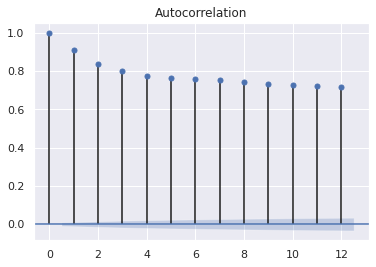

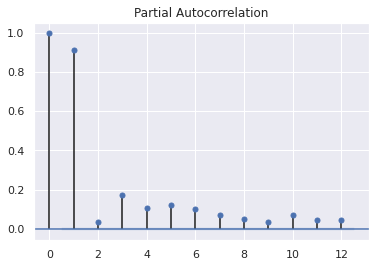

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_t,lags=12)
plot_pacf(data_t,lags=12)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
add_result = seasonal_decompose(data_t['AQI'], model='addictive',period=1)

In [ ]:
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,10
add_result.plot().suptitle('\nAdditive Decompose')
plt.show()

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 74.0 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data_t['AQI'],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=507702.176, Time=33.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=514064.335, Time=2.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=513758.816, Time=3.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=513525.012, Time=9.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=514062.335, Time=0.63 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=507700.841, Time=25.77 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=509502.333, Time=13.62 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=508460.288, Time=17.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=507702.427, Time=38.67 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=508151.248, Time=29.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=507715.341, Time=28.61 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=507704.549, Time=47.24 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=507698.850, Time=9.17 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=509500.332, Time=6.34 s

In [ ]:
print(data_t.shape)
test=data_t.iloc[:-39888]
train=data_t.iloc[-39888:]
print(train.shape,test.shape)
#splitting data to test and train data set

(49861, 1)
(39888, 1) (9973, 1)


In [ ]:
from statsmodels.tsa.arima_model import ARMA

In [ ]:
import statsmodels.api as sm

In [ ]:
# scale train and test data to [-1, 1]
from sklearn.preprocessing import MinMaxScaler
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled
    

In [ ]:
data_se=data_t.squeeze()

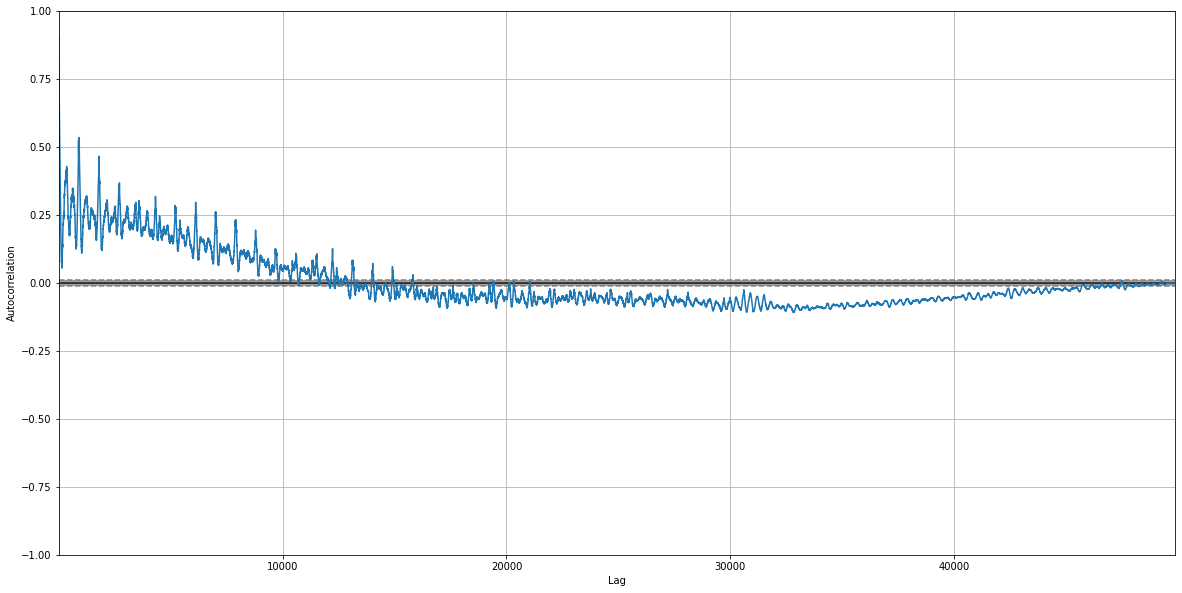

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_se)
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels

                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                49861
Model:                 ARIMA(1, 1, 2)   Log Likelihood             -253845.425
Date:                Sat, 07 Jan 2023   AIC                         507698.850
Time:                        05:49:28   BIC                         507734.118
Sample:                             0   HQIC                        507709.899
                              - 49861                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4770      0.007     67.824      0.000       0.463       0.491
ma.L1         -0.6681      0.007    -90.501      0.000      -0.683      -0.654
ma.L2         -0.1861      0.005    -39.753      0.0

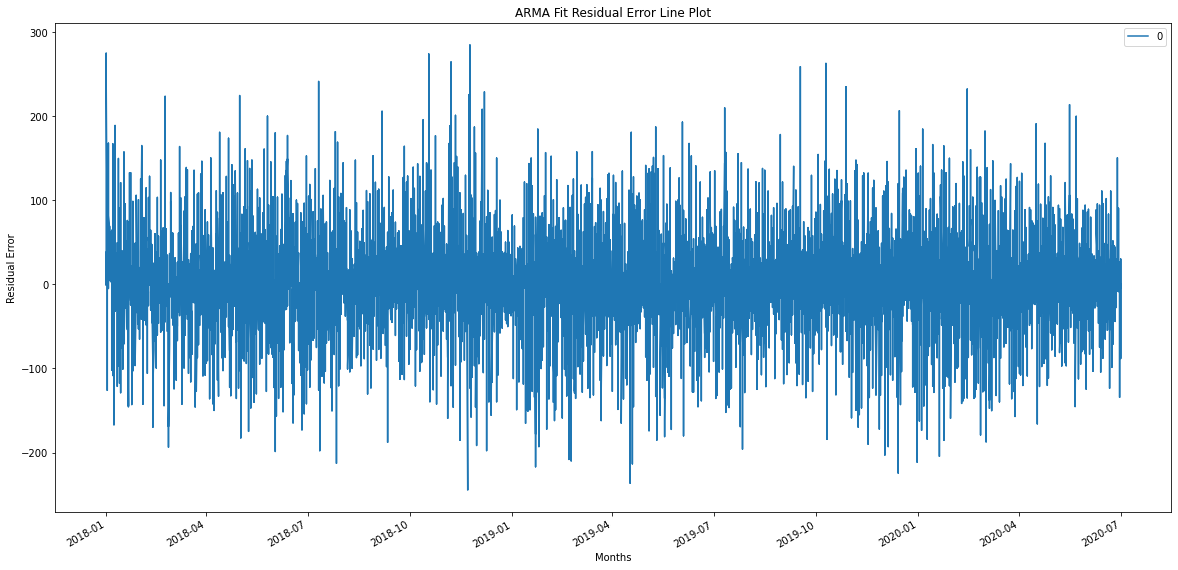

In [ ]:
# importing arima library
from statsmodels.tsa.arima_model import ARIMA


model = sm.tsa.arima.ARIMA(data_se, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARMA Fit Residual Error Line Plot')
plt.xlabel('Months')
plt.ylabel('Residual Error')
plt.show()

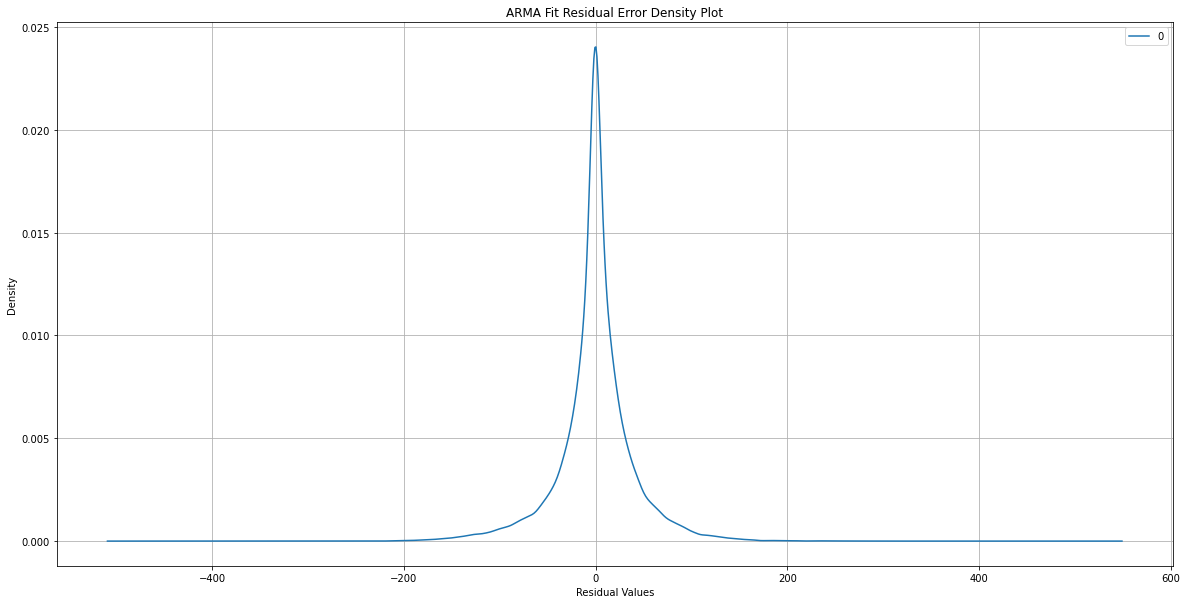

                  0
count  4.986100e+04
mean  -9.295298e-03
std    3.935027e+01
min   -2.446675e+02
25%   -1.381857e+01
50%    2.842171e-14
75%    1.562276e+01
max    2.846592e+02


In [ ]:
residuals.plot(kind='kde')
plt.title('ARMA Fit Residual Error Density Plot')
plt.xlabel('Residual Values')
plt.grid()
plt.show()
print(residuals.describe())

In [ ]:
from sklearn.metrics import mean_squared_error
 

X = data_se.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
print(train.shape)
test.shape

(39888,)


(9973,)

In [ ]:
model = sm.tsa.arima.ARIMA(test, order=(1,1,2))
model_fit = model.fit()
output = model_fit.forecast()
yhat = output[0]
print(yhat)
# predictions = []
# predictions.append(yhat)
# yhat.plot(legend=True)
# test.plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error
 

X = data_se.values
size = int(len(X) * 0.90)


train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []


for t in range(len(test)):
	model = sm.tsa.arima.ARIMA(history, order=(1,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
    




# plot
plt.plot(test, label = 'original sales', marker = '*')
plt.plot(predictions, color='red', label = 'predicted sales', marker = '*')
plt.title('Performance Evaluation')
plt.xlabel('Future Steps')
plt.ylabel('Sales')
plt.legend()
plt.show()

predicted=141.968184, expected=160.000000
predicted=132.841190, expected=82.000000
predicted=75.437735, expected=180.000000
predicted=166.113140, expected=111.000000
predicted=95.785109, expected=197.000000
predicted=180.360767, expected=156.000000
predicted=134.210488, expected=157.000000
predicted=146.635414, expected=167.000000
predicted=153.961547, expected=160.000000
predicted=148.873514, expected=157.000000
predicted=149.006045, expected=87.000000
predicted=93.589411, expected=147.000000
predicted=151.228390, expected=130.000000
predicted=126.348046, expected=142.000000
predicted=141.120122, expected=61.000000
predicted=73.111774, expected=62.000000
predicted=84.565747, expected=61.000000
predicted=78.368822, expected=61.000000
predicted=76.962074, expected=91.000000
predicted=99.124452, expected=131.000000
predicted=126.208319, expected=78.000000
predicted=79.145469, expected=68.000000
predicted=79.490935, expected=61.000000
predicted=72.093631, expected=61.000000
predicted=71.8

KeyboardInterrupt: ignored

In [ ]:
import math
error = mean_squared_error(test, predictions)
print('Test Root Mean Squared Error: %.3f' % math.sqrt(error))

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
model=sm.tsa.arima.ARIMA(train,order=(1,1,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                37396
Model:                 ARIMA(1, 1, 2)   Log Likelihood             -193561.156
Date:                Sat, 07 Jan 2023   AIC                         387130.312
Time:                        05:38:34   BIC                         387164.429
Sample:                             0   HQIC                        387141.145
                              - 37396                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4817      0.009     54.984      0.000       0.465       0.499
ma.L1         -0.6659      0.009    -72.164      0.000      -0.684      -0.648
ma.L2         -0.1871      0.006    -32.325      0.000      -0.198      -0.176
sigma2      1834.1792      8.855    207.129      0.000    1816.823    1851.535
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             14420.41
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=len(train)+len(test)
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.index=data_t.index[start:end+1]
pred.plot(legend=True)
test.plot(legend=True)

AttributeError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print(test['AQI'].mean())
rmse=sqrt(mean_squared_error(pred,test['AQI']))
print(rmse)

215.94284568334504
179.6465279214635


prophet

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 9.0 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6751427 sha256=d2f734671498d94082e4966c5c9098ce9c9a0782aa4ec3cde25823ceca147fb0
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet


In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet

In [ ]:
data_t1=data2[['Date','AQI']]

In [ ]:
data_t1=data_t1.rename(columns={"Date": "ds","AQI":"y"})

In [ ]:
# #set hour as index column
# data_t1.set_index('ds')
# data_t1.index = pd.to_datetime(data_t1.DS)
# data_t1.drop(['ds'], axis = 1, inplace=True)
data_t1

Date    AQI
4365   2018-11-11  201.0
4366   2018-11-12  353.0
4367   2018-11-13  353.0
4368   2018-11-14  353.0
4369   2018-11-15  280.0
...           ...    ...
77393  2020-06-27   61.0
77394  2020-06-28   65.0
77395  2020-06-29   63.0
77396  2020-06-30   61.0
77397  2020-07-01   61.0

[49861 rows x 2 columns]

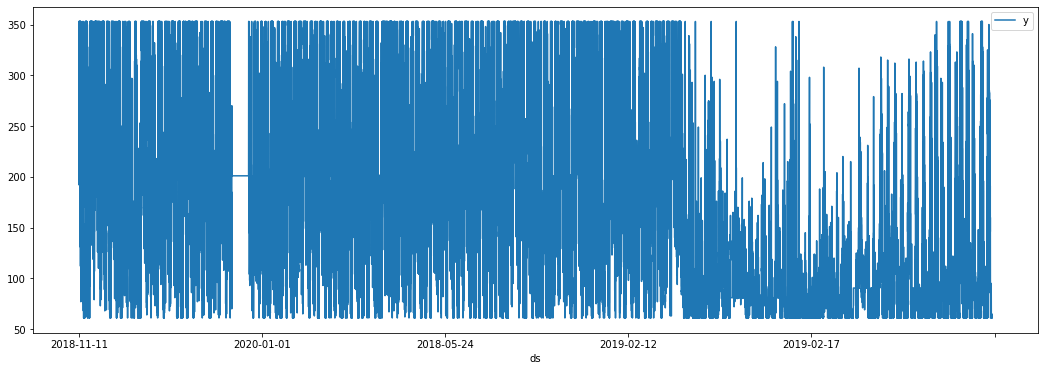

In [ ]:
data_t1.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
data_t1.shape

(49861, 2)

In [ ]:
train=data_t1.iloc[:-3000]
test=data_t1.iloc[-3000:]

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365,freq='H') #MS for monthly, H for hourly
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast.tail()

ds       trend  yhat_lower  yhat_upper  trend_lower  \
1273 2020-07-16 01:00:00  125.041019  -52.967940  158.385303   124.827289   
1274 2020-07-16 02:00:00  125.034956  -54.165500  155.041961   124.814180   
1275 2020-07-16 03:00:00  125.028894  -53.130176  148.152887   124.798406   
1276 2020-07-16 04:00:00  125.022831  -57.334074  150.686442   124.789915   
1277 2020-07-16 05:00:00  125.016769  -50.587965  149.181836   124.787059   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
1273   125.206052      -75.797963            -75.797963            -75.797963   
1274   125.202656      -75.849000            -75.849000            -75.849000   
1275   125.199412      -75.908228            -75.908228            -75.908228   
1276   125.196168      -75.976007            -75.976007            -75.976007   
1277   125.192924      -76.052647            -76.052647            -76.052647   

        weekly  weekly_lower  weekly_upper     yearly  yearly_lower  \
1273  3.021797      3.021797      3.021797 -78.819760    -78.819760   
1274  3.006381      3.006381      3.006381 -78.855382    -78.855382   
1275  2.982543      2.982543      2.982543 -78.890771    -78.890771   
1276  2.949922      2.949922      2.949922 -78.925929    -78.925929   
1277  2.908208      2.908208      2.908208 -78.960855    -78.960855   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
1273    -78.819760                   0.0                         0.0   
1274    -78.855382                   0.0                         0.0   
1275    -78.890771                   0.0                         0.0   
1276    -78.925929                   0.0                         0.0   
1277    -78.960855                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
1273                         0.0  49.243056  
1274                         0.0  49.185956  
1275                         0.0  49.120665  
1276                         0.0  49.046824  
1277                         0.0  48.964122

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
1273 2020-07-16 01:00:00  49.243056  -52.967940  158.385303
1274 2020-07-16 02:00:00  49.185956  -54.165500  155.041961
1275 2020-07-16 03:00:00  49.120665  -53.130176  148.152887
1276 2020-07-16 04:00:00  49.046824  -57.334074  150.686442
1277 2020-07-16 05:00:00  48.964122  -50.587965  149.181836

In [ ]:
test.tail()

ds     y
77393  2020-06-27  61.0
77394  2020-06-28  65.0
77395  2020-06-29  63.0
77396  2020-06-30  61.0
77397  2020-07-01  61.0

In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
import plotly.graph_objs as go
plot_plotly(m,forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
from statsmodels.tools.eval_measures import rmse
predictions = forecast.iloc[-3000:]['yhat']
predictions

0       274.833646
1       275.920039
2       276.592245
3       276.279738
4       272.156242
           ...    
1273     49.243056
1274     49.185956
1275     49.120665
1276     49.046824
1277     48.964122
Name: yhat, Length: 1278, dtype: float64

In [ ]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

ValueError: ignored